In [15]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn import decomposition
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
docs = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
docs_df = pd.DataFrame(docs.data, columns=["text"])
docs_df['topic'] = pd.Series(data=docs.target, index=docs_df.index)
# docs_df
docs_df

,text,topic
0,"Hi,\n\nI've noticed that if you only save a mo...",1
1,"\n\nSeems to be, barring evidence to the contr...",3
2,\n >In article <1993Apr19.020359.26996@sq.sq.c...,2
3,I have a request for those who would like to s...,0
4,AW&ST had a brief blurb on a Manned Lunar Exp...,2
...,...,...
2029,\n Did the Russian spacecraft(s) on the ill-f...,2
2030,"\n\nOh gee, a billion dollars! That'd be just...",2
2031,I am looking for software to run on my brand n...,1
2032,\n\nThis is becoming a tiresome statement. Co...,0


In [17]:
stop_words = stopwords.words('english')
sw1 = ['dont','im','also','it','thank','thanks','could','get','would','even','know','say','much','well']
stop_words.extend(sw1)
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

PUNCTUATION = '[^\w\s]' #^=not, \w=alphanumeric character, \s=space
docs_df['text'] = docs_df['text'].str.lower()
docs_df['text'] = docs_df['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))
# docs_df['text'] = docs_df['text'].apply(lambda x: lemmatizer.lemmatize(x))
docs_df['text'] = docs_df['text'].apply(lambda x: stemmer.stem(x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub(PUNCTUATION, '', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('\n', ' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('[\d-]', ' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))
docs_df

,text,topic
0,hi ive noticed save model mapping planes posit...,1
1,seems barring evidence contrary koresh simply ...,3
2,article apr sqsqcom msbsqsqcom mark brader mb ...,2
3,request like see charley wingate respond charl...,0
4,awst brief blurb manned lunar exploration conf...,2
...,...,...
2029,russian spacecrafts illfated phobos mission ye...,2
2030,oh gee billion dollars thatd enough cover cost...,2
2031,looking software run brand new targa anyone kn...,1
2032,becoming tiresome statement coming definition ...,0


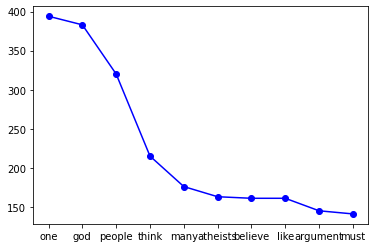

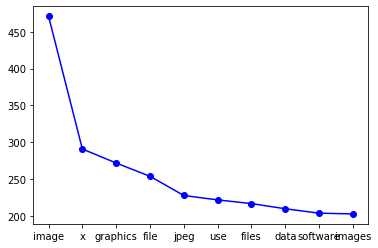

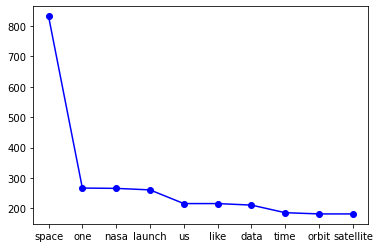

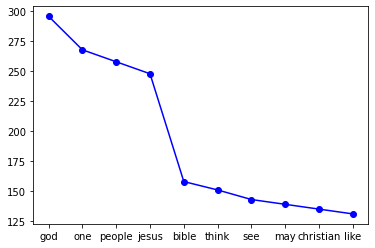

In [39]:
for x in range(4):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    commondf
    common = ' '.join(commondf['text'])
    common = pd.Series(common.split()).value_counts()[:10]
    commondft = pd.DataFrame(common)
    commondft.rename( columns={0 :'count'}, inplace=True )
    plt.plot(commondft['count'], color='blue', marker='o')
    plt.show()



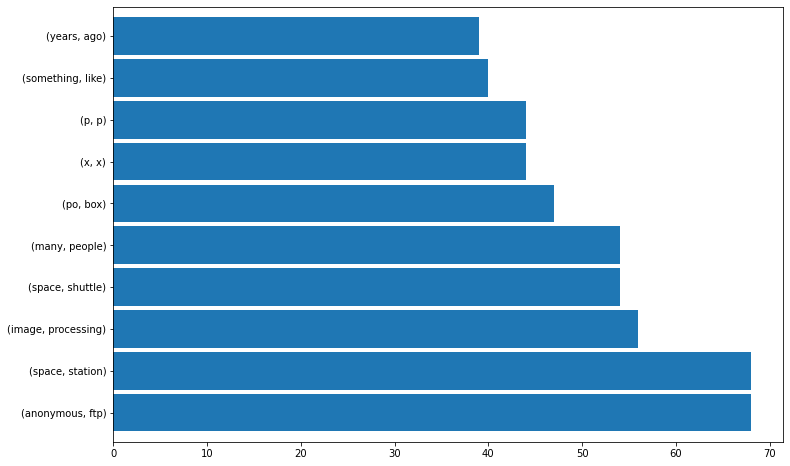

In [47]:
for x in range(4):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    bigrams = ' '.join(commondf['text'])
    bigrams = pd.Series(bigrams.split()).value_counts() 
    bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
    bigrams.plot.barh(width=.9, figsize=(12, 8))


<AxesSubplot:>

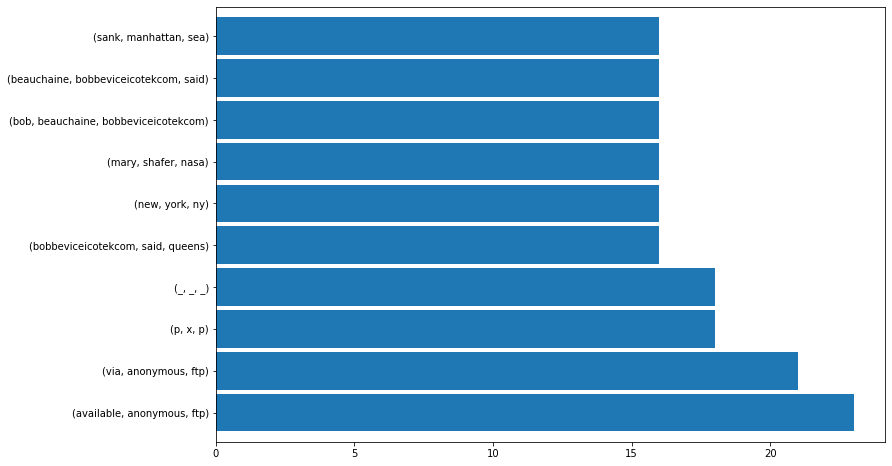

In [19]:
trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
trigrams.plot.barh(width=.9, figsize=(12, 8))

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

v = TfidfVectorizer()
x = v.fit_transform(docs_df['text'])
df_tfidf = pd.DataFrame(x.todense())

lda_model=LatentDirichletAllocation(n_components=4,learning_method='online',random_state=42,max_iter=100) 
lda_top=lda_model.fit_transform(x.todense())

svd_model = TruncatedSVD(n_components=4,algorithm='randomized',n_iter=10)
svd_top = svd_model.fit_transform(x.todense())

print('hi')

hi


In [21]:
vocab = v.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ", end = " ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0:  critu den compass surreal sriniva moments op_cols int xp yp 

Topic 1:  one think like people god space anyone good please time 

Topic 2:  deletion ditto compuservecom methodology sherzer photosynthetic yeager de varieties van 

Topic 3:  cockroaches lunacy tiger categorizing godless psa mercies anger tender mauled 



In [22]:
for i, comp in enumerate(svd_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ", end = " ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0:  one god people think like space good time us jesus 

Topic 1:  space program files image graphics file data email software ftp 

Topic 2:  space nasa launch lunar shuttle moon orbit station us satellite 

Topic 3:  beauchaine bronx manhattan bobbeviceicotekcom sank queens blew bob sea stay 

